In [83]:
import pandas as pd
from sklearn import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import math


# Understanding the data

In [2]:
# dataframe = pd.read_csv('math_outputs.csv').drop(['Unnamed: 0'], axis='columns')
dataframe = pd.read_csv('kmeans_output.csv').drop(['Unnamed: 0'], axis='columns')

In [3]:
# correlation = dataframe.drop(['Experiment', 'Unnamed: 0.1'], axis='columns')
# correlation.corr(method="pearson")

# plt.figure(figsize=(10,10))
# sns.heatmap(correlation.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples')
# plt.show()


In [4]:
# sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# Treating data

In [5]:
# y = dataframe['chatter_presence_s']
# x = dataframe.copy().drop(['Experiment', 'chatter_presence_s'], axis="columns", inplace=False)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2/3, random_state=0)

In [6]:
y = dataframe['cluster']
x = dataframe.copy().drop(['Experiment', 'cluster'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2/3, random_state=0)

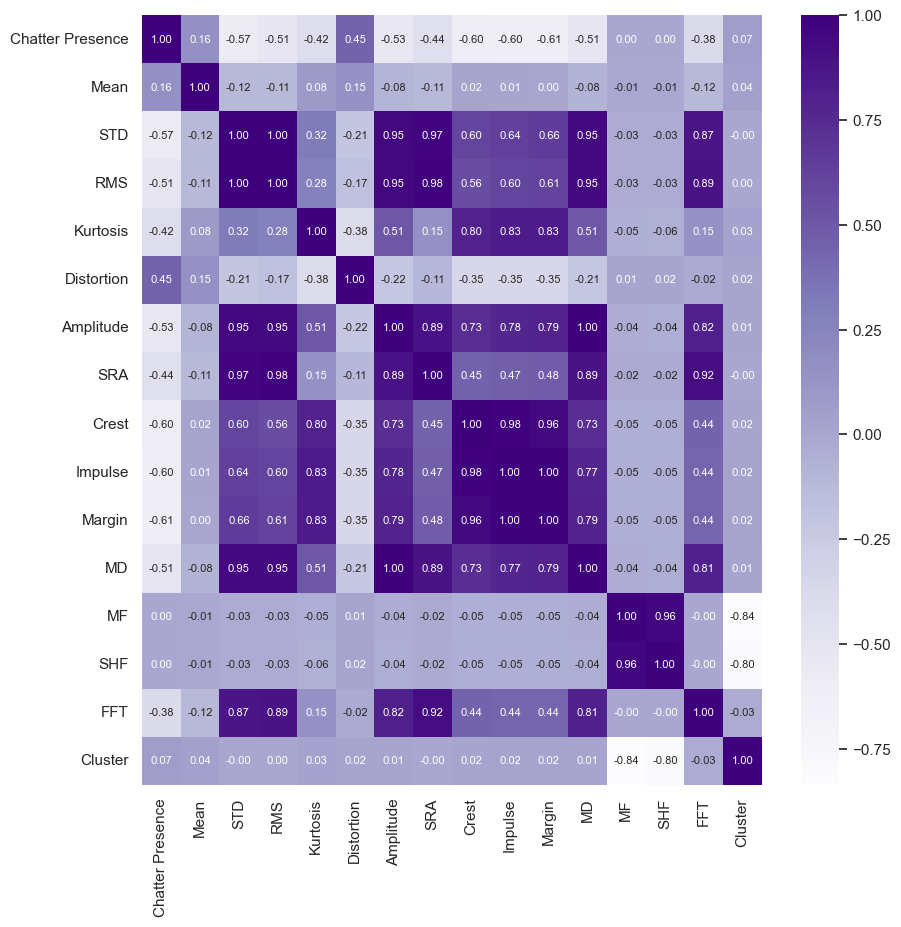

In [7]:
sns.set(font_scale=1)
correlation = dataframe.drop(['Experiment', 'Unnamed: 0.1'], axis='columns')
correlation = correlation.rename(columns={'med': 'Mean','std': 'STD', 'rms': 'RMS', 'curtose': 'Kurtosis',
                                           'distortion': 'Distortion', 'amplitude': 'Amplitude', 'sra': 'SRA', 
                                           'crest': 'Crest', 'impulse': 'Impulse', 'margin': 'Margin', 
                                           'max': 'MD', 'freq_max': 'MF', 'freq_sec_highest': 'SHF', 
                                           'fft_mean': 'FFT', 'cluster': 'Cluster', 'chatter_presence': 'Chatter Presence'})
correlation.corr(method="pearson")

plt.figure(figsize=(10,10))
sns.heatmap(correlation.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples', annot_kws={"size":8})
plt.show()

# Models

In [8]:
lreg = LinearRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

## Random Forest


In [9]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [10]:
rf_start = time.time()

In [11]:
rf_pred = rf.predict(x_test)

In [12]:
rf_end = time.time()

In [13]:
acc_rf = accuracy_score(y_test, rf_pred)

print(acc_rf)
print(rf_end - rf_start)

0.9918032786885246
0.016084671020507812


### GridSearchCV

In [14]:
# params_rf = { 
#     'n_estimators': [5, 10, 15, 30, 40, 50],
#     'max_features': ['auto'],
#     'max_depth' : [4,5,6,7,8, 9, 10, 11],
#     "min_samples_split": [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 7, 9, 11],
#     'criterion' :['poisson', 'gini', 'squared_error', 'absolute_error', 'friedman_mse']
# }

In [15]:
# CV_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv= 5)

In [16]:
# CV_rf.fit(x_train, y_train)
# clear_output()

In [17]:
# CV_rf.best_params_

In [18]:
# CV_rf.best_score_

'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30

In [19]:
params_rf_grid = {'criterion': ['gini'],
 'max_depth': [4],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [15]}

In [20]:
CV_rf_grid = GridSearchCV(estimator=rf, param_grid=params_rf_grid, cv= 5)

In [21]:
CV_rf_grid.fit(x_train, y_train)

C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\lo

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [15]})

In [22]:
rf_start_grid = time.time()

In [23]:
rf_pred_grid = CV_rf_grid.predict(x_test) # .best_estimator_

In [24]:
rf_end_grid = time.time()

In [25]:
acc_rf_grid = accuracy_score(y_test, rf_pred_grid)

print(acc_rf_grid)
print(rf_end_grid - rf_start_grid)

0.9918032786885246
0.01006937026977539


## Decision Tree

In [26]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
dt_start = time.time()

In [28]:
dt_pred = dt.predict(x_test)

In [29]:
dt_end = time.time()

In [30]:
acc_dt = accuracy_score(y_test, dt_pred)

print(acc_dt)
print(dt_end - dt_start)

0.9918032786885246
0.0088653564453125


### GridSearchCV

In [31]:
dt_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(3,80), 
    'min_samples_leaf': range(1,15),
    'max_leaf_nodes': range(1,50),
} #[3,5,8,15,30,40,50,60, 80]

In [32]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)

dt_grid.fit(x_train, y_train)

C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10780 fits failed out of a total of 528220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10780 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 80),
                         'max_leaf_nodes': range(1, 50),
                         'min_samples_leaf': range(1, 15)})

In [33]:
print(dt_grid.best_estimator_)
print(dt_grid.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)
1.0


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)
1.0

In [34]:
dt_grid.best_estimator_.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)

In [35]:
dt_start_grid = time.time()

dt_pred_grid = dt_grid.best_estimator_.predict(x_test)

In [36]:
dt_end_grid = time.time()

In [37]:
acc_dt_grid = accuracy_score(y_test, dt_pred_grid)

print(acc_dt_grid)
print(dt_end_grid - dt_start_grid)

0.9918032786885246
0.006727933883666992


## KNN

In [38]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
knn_start = time.time()

In [40]:
knn_pred = knn.predict(x_test)

In [41]:
knn_end = time.time()

In [42]:
acc_knn = accuracy_score(y_test, knn_pred)

print(acc_knn)
print(knn_end - knn_start)

0.9262295081967213
0.12529230117797852


### GridSearch

In [43]:
params = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [44]:
knn_grid = GridSearchCV(KNeighborsClassifier(), params, cv=11, scoring='accuracy')

knn_grid.fit(x_train, y_train)

GridSearchCV(cv=11, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [45]:
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)

KNeighborsClassifier(metric='manhattan', n_neighbors=43)
0.975206611570248


KNeighborsClassifier(metric='manhattan', n_neighbors=43)
0.975206611570248

In [46]:
knn_grid.best_estimator_.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=43)

In [47]:
knn_start_grid = time.time()

In [48]:
knn_grid_pred = knn_grid.predict(x_test)

In [49]:
knn_end_grid = time.time()

In [50]:
acc_knn_grid = accuracy_score(y_test, knn_grid_pred)

print(acc_knn_grid)
print(knn_end_grid - knn_start_grid)

0.9590163934426229
0.017768383026123047


## SVM

### Linear

In [51]:
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
cl_start = time.time()
svm_linear_pred = classifier_linear.predict(x_test)
cl_end = time.time()

In [53]:
acc_svm_linear = accuracy_score(y_test, svm_linear_pred)
acc_svm_linear

print(acc_svm_linear)
print(cl_end - cl_start)

1.0
0.001001119613647461


#### GridSearchCV Linear SVM


In [54]:
params_svm_linear = {'C': [0.1, 1, 10, 100, 1000], # 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # 
              'kernel': ['linear']} 

In [55]:
classifier_linear_grid = GridSearchCV(classifier_linear, params_svm_linear, refit = True, verbose = 3)


In [56]:
classifier_linear_grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ...C=10, gamma=

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [57]:
print(classifier_linear_grid.best_estimator_) # C=0.1, gamma=1, kernel='linear', random_state=0
print(classifier_linear_grid.best_score_)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)
0.9917517006802722


SVC(C=0.1, gamma=1, kernel='linear', random_state=0)
0.9917517006802722

In [58]:
classifier_linear_grid.best_estimator_.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [59]:
cl_start_grid = time.time()
pred_svm_linear_grid = classifier_linear_grid.predict(x_test)
cl_end_grid = time.time()

In [60]:
acc_svm_linear_grid = accuracy_score(y_test, pred_svm_linear_grid)
# acc_svm_linear_grid
print(acc_svm_linear_grid)
print(cl_end_grid - cl_start_grid)

1.0
0.0010008811950683594


### rbf

In [61]:
classifier_rbf.fit(x_train, y_train)

SVC(random_state=0)

In [62]:
rbf_start = time.time()
svm_rbf_pred = classifier_rbf.predict(x_test)
rbf_end = time.time()

In [63]:
acc_svm_rbf = accuracy_score(y_test, svm_rbf_pred)
# acc_svm_rbf
print(acc_svm_rbf)
print(svm_rbf_pred - rbf_start)

0.9508196721311475
[-1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09 -1.68886213e+09
 -1.68

#### GridSearchCV rbf

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
classifier_rbf_grid = GridSearchCV(classifier_rbf, param_grid=param_grid, cv=cv)
classifier_rbf_grid.fit(x_train, y_train)


# # acc_svm_rbf_grid = grid.best_score_
# # print(
# #     "The best parameters are %s with a score of %0.5f"
# #     % (grid.best_params_, grid.best_score_)
# # )

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(random_state=0),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [65]:
print(classifier_rbf_grid.best_estimator_)
print(classifier_rbf_grid.best_score_)

SVC(C=10000.0, gamma=1e-09, random_state=0)
1.0


SVC(C=10000.0, gamma=1e-09, random_state=0)
1.0

In [66]:
classifier_rbf_grid.best_estimator_.fit(x_train, y_train)

SVC(C=10000.0, gamma=1e-09, random_state=0)

In [67]:
crbf_start_grid = time.time()
pred_svm_rbf_grid = classifier_rbf_grid.predict(x_test)
crbf_end_grid = time.time()

In [68]:
acc_svm_rbf_grid = accuracy_score(y_test, pred_svm_rbf_grid)
print(acc_svm_rbf_grid)
print(crbf_end_grid - crbf_start_grid)

0.9754098360655737
0.0010004043579101562


In [69]:
# acc_svm_rbf_grid = 0.8297

# Model results

In [70]:
results = pd.DataFrame(
    np.array([[acc_svm_linear, acc_svm_linear_grid, acc_svm_rbf, acc_svm_rbf_grid,               acc_rf,         acc_rf_grid,                acc_dt,         acc_dt_grid,                acc_knn,  acc_knn_grid]]),
    columns=['svm_linear',    'svm_linear_gridsearch',    'svm_rbf',   'svm_rbf_gridsearch',    'random_forest', 'random_forset_gridsearch', 'decision_tree', 'decision_tree_gridsearch', 'knn',    'knn_grid'],
    index=['accuracy_score']
)

In [71]:
results.round(4)

,svm_linear,svm_linear_gridsearch,svm_rbf,svm_rbf_gridsearch,random_forest,random_forset_gridsearch,decision_tree,decision_tree_gridsearch,knn,knn_grid
accuracy_score,1.0,1.0,0.9508,0.9754,0.9918,0.9918,0.9918,0.9918,0.9262,0.959


In [72]:
results.to_csv('results.csv')


# cross-validation

In [73]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

In [74]:
# # Cross-validation
# from sklearn.model_selection import ShuffleSplit

# cv_start = time.time()

# n_samples = x.shape[0]
# cv = ShuffleSplit(n_splits = 8, test_size = 0.2, random_state = 0)

# results_cv = []
# for i in range(0,5):
#     model_name = ("Random Forest", "Decision Tree", 
#               "KNN", "Classifier linear", 
#               'Classifier rbf')
#     model = (rf, dt, knn, classifier_linear, classifier_rbf)
    
#     # print(model_name[i], ", score:", cross_val_score(model[i], x, y, cv=cv, scoring="accuracy"))
#     print(model_name[i], ", lowest score:", min(cross_val_score(model[i], x, y, cv=cv, scoring="accuracy")).round(4)*100)
#     print(model_name[i], ", highest score:", max(cross_val_score(model[i], x, y, cv=cv, scoring="accuracy")).round(4)*100)

#     results_cv.append([model_name[i], min(cross_val_score(model[i], x, y, cv=cv, scoring="accuracy"))])

# cv_end = time.time()


In [75]:
# Cross-validation
from sklearn.model_selection import ShuffleSplit

cv_start = time.time()

n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=8, test_size=0.2, random_state=0)

results_cv = []
execution_times = []  # List to store execution times

for i in range(0, 5):
    model_name = ("Random Forest", "Decision Tree", "KNN", "Classifier linear", "Classifier rbf")
    model = (rf, dt, knn, classifier_linear, classifier_rbf)

    start_time = time.time()  # Start measuring time

    # Perform cross-validation
    scores = cross_val_score(model[i], x, y, cv=cv, scoring="accuracy")
    
    # Calculate lowest and highest scores
    lowest_score = min(scores).round(4) * 100
    highest_score = max(scores).round(4) * 100

    execution_time = time.time() - start_time  # Calculate execution time

    print(model_name[i], ", lowest score:", lowest_score)
    print(model_name[i], ", highest score:", highest_score)
    print(model_name[i], ", execution time:", execution_time)

    results_cv.append([model_name[i], lowest_score])
    execution_times.append([model_name[i], execution_time])

cv_end = time.time()


Random Forest , lowest score: 98.63
Random Forest , highest score: 100.0
Random Forest , execution time: 0.786536693572998
Decision Tree , lowest score: 98.63
Decision Tree , highest score: 100.0
Decision Tree , execution time: 0.01901698112487793
KNN , lowest score: 91.78
KNN , highest score: 98.63
KNN , execution time: 0.05605125427246094
Classifier linear , lowest score: 98.63
Classifier linear , highest score: 100.0
Classifier linear , execution time: 0.028025388717651367
Classifier rbf , lowest score: 94.52000000000001
Classifier rbf , highest score: 98.63
Classifier rbf , execution time: 0.028025150299072266


In [127]:
results_cv
# execution_times[0][1]

[['Random Forest', 98.63],
 ['Decision Tree', 98.63],
 ['KNN', 91.78],
 ['Classifier linear', 98.63],
 ['Classifier rbf', 94.52000000000001]]

# Time

In [139]:
times = {
    'cross-validation': [0 , cv_end - cv_start],
    #
    'svm_linear': [ acc_svm_linear, cl_end - cl_start],
    'svm_rbf': [acc_svm_rbf ,  rbf_end - rbf_start],
    'random_forest': [acc_rf , rf_end - rf_start],
    'decision_tree': [acc_dt , dt_end - dt_start],
    'knn': [acc_knn , knn_end - knn_start],
    #
    'svm_linear_cv': [results_cv[3][1] , execution_times[3][1]],
    'svm_rbf_cv': [results_cv[4][1] , execution_times[4][1]],
    'random_forest_cv': [results_cv[0][1] , execution_times[0][1]],
    'decision_tree_cv': [results_cv[1][1] , execution_times[1][1]],
    'knn_cv': [results_cv[2][1] , execution_times[2][1]],
    #
    'svm_linear_gridsearch': [acc_svm_linear_grid , cl_end_grid - cl_start_grid],
    'svm_rbf_gridsearch': [acc_svm_rbf_grid , crbf_end_grid - crbf_start_grid],
    'random_forest_gridsearch': [acc_rf_grid , rf_end_grid - rf_start_grid],
    'decision_tree_gridsearch': [acc_dt_grid , dt_end_grid - dt_start_grid],
    'knn_grid': [acc_knn_grid , knn_end_grid - knn_start_grid]
}

times = pd.DataFrame(times, index=['Accuracy', 'Time'])

In [140]:
times.round(4)

,cross-validation,svm_linear,svm_rbf,random_forest,decision_tree,knn,svm_linear_cv,svm_rbf_cv,random_forest_cv,decision_tree_cv,knn_cv,svm_linear_gridsearch,svm_rbf_gridsearch,random_forest_gridsearch,decision_tree_gridsearch,knn_grid
Accuracy,0.0000,1.000,0.9508,0.9918,0.9918,0.9262,98.630,94.520,98.6300,98.630,91.7800,1.000,0.9754,0.9918,0.9918,0.9590
Time,0.9187,0.001,0.0020,0.0161,0.0089,0.1253,0.028,0.028,0.7865,0.019,0.0561,0.001,0.0010,0.0101,0.0067,0.0178


In [110]:
times.to_csv('model_time_in_s.csv')

In [115]:
times_acc = pd.DataFrame(
    np.array([(cv_end - cv_start, cl_end - cl_start, cl_end_grid - cl_start_grid, rbf_end - rbf_start, crbf_end_grid - crbf_start_grid, rf_end - rf_start, rf_end_grid - rf_start_grid, dt_end - dt_start, dt_end_grid - dt_start_grid, knn_end - knn_start, knn_end_grid - knn_start_grid),
              (0, acc_svm_linear, acc_svm_linear_grid, acc_svm_rbf, acc_svm_rbf_grid, acc_rf, acc_rf_grid, acc_dt, acc_dt_grid, acc_knn,  acc_knn_grid),
              (0, results_cv[3][1], acc_svm_linear_grid, results_cv[4][1], acc_svm_rbf_grid, results_cv[0][1], acc_rf_grid, results_cv[1][1], acc_dt_grid, results_cv[2][1],  acc_knn_grid)]),
    columns=['cross-validation', 'svm_linear',    'svm_linear_gridsearch',    'svm_rbf',   'svm_rbf_gridsearch', 'random_forest', 'random_forest', 'decision_tree', 'decision_tree_gridsearch', 'knn',    'knn_gridsearch'],
    index=[['duration (s)', 'accuracy_score', "cross-validation accuracy_score"]]
)

In [116]:
times_acc.dtypes

cross-validation            float64
svm_linear                  float64
svm_linear_gridsearch       float64
svm_rbf                     float64
svm_rbf_gridsearch          float64
random_forest               float64
random_forest               float64
decision_tree               float64
decision_tree_gridsearch    float64
knn                         float64
knn_gridsearch              float64
dtype: object

In [119]:
# for col in times_acc.columns:
times_acc = times_acc.round(4)

In [120]:
times_acc

,cross-validation,svm_linear,svm_linear_gridsearch,svm_rbf,svm_rbf_gridsearch,random_forest,random_forest,decision_tree,decision_tree_gridsearch,knn,knn_gridsearch
duration (s),0.9187,0.001,0.001,0.0020,0.0010,0.0161,0.0101,0.0089,0.0067,0.1253,0.0178
accuracy_score,0.0000,1.000,1.000,0.9508,0.9754,0.9918,0.9918,0.9918,0.9918,0.9262,0.9590
cross-validation accuracy_score,0.0000,98.630,1.000,94.5200,0.9754,98.6300,0.9918,98.6300,0.9918,91.7800,0.9590


# Optimization